<a href="https://colab.research.google.com/github/victornunesvidal/pucrj-mvp-analise-de-dados/blob/main/MVP_AnaliseDados_PUCRJ_VICTORVIDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Definição do Problema

Objetivo: Explorar o dataset "war.csv" para entender e descrever as características dos filmes e séries do gênero "guerra" presentes, com foco em análise exploratória e pré-processamento de dados.

Descrição do Problema: Este é um problema de análise de dados, onde pretendemos extrair insights e preparar os dados para futuras análises ou modelagem, considerando informações sobre filmes e séries de guerra.

Supervisionado ou Não Supervisionado: Não supervisionado.

Premissas ou Hipóteses: Há uma quantidade grande de filmes que retratam a 2ª guerra mundial. Vamos ver se isso se reflete nos dados.

Restrições ou Condições: N/A.

Definição dos Atributos do Dataset: O dataset contém informações sobre filmes de guerra, incluindo detalhes como título, diretor, atores, gênero, etc.

In [16]:
# Instale as bibliotecas necessárias
!pip install pandas matplotlib seaborn

# Importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o dataset
url = 'https://raw.githubusercontent.com/victornunesvidal/pucrj-mvp-analise-de-dados/main/war.csv'
df = pd.read_csv(url)

# Visualize as primeiras linhas do dataset
df.head()


,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt2934286,Halo,(2022– ),7.0,TV-14,60 min,"Action, Adventure, Sci-Fi","49,338",NaN,NaN,NaN,"nm1032567,nm0000818,nm8159209,nm2315236","Pablo Schreiber,Shabana Azmi,Natasha Culzac,Ol...",Aliens threaten human existence in an epic 26t...
1,tt2306299,Vikings,(2013–2020),8.5,TV-MA,44 min,"Action, Adventure, Drama","513,046",NaN,NaN,NaN,"nm0935395,nm0803890,nm1573253,nm6354997","Katheryn Winnick,Gustaf Skarsgård,Alexander Lu...",Vikings transports us to the brutal and myster...
2,tt1879016,Operation Mincemeat,(2021),6.6,PG-13,128 min,"Drama, War","16,363",NaN,nm0006960,John Madden,"nm0000147,nm0532193,nm0531808,nm0942782","Colin Firth,Matthew Macfadyen,Kelly Macdonald,...","During WWII, two intelligence officers use a c..."
3,tt9637132,Samrat Prithviraj,(2022),7.5,NaN,135 min,"Action, Drama, History","47,472",NaN,nm1363374,Chandra Prakash Dwivedi,"nm0474774,nm0004569,nm10035940,nm2799219","Akshay Kumar,Sanjay Dutt,Manushi Chhillar,Saks...",A fearless warrior. An epic love story. Witnes...
4,tt0185906,Band of Brothers,(2001),9.4,TV-MA,594 min,"Drama, History, War","447,718",NaN,NaN,NaN,"nm0342241,nm0507073,nm0515296,nm0853169","Scott Grimes,Damian Lewis,Ron Livingston,Shane...",The story of Easy Company of the U.S. Army 101...


As primeiras linhas do dataset mostram algumas séries com a temática de guerra. Estão faltando alguns dados de "gross income", "directors_id" e "directors_name". Mas esses dados não são tão relevantes para a nossa análise.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52529 entries, 0 to 52528
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              52529 non-null  object 
 1   name            52529 non-null  object 
 2   year            51283 non-null  object 
 3   rating          21068 non-null  float64
 4   certificate     9674 non-null   object 
 5   duration        27775 non-null  object 
 6   genre           52529 non-null  object 
 7   votes           21068 non-null  object 
 8   gross_income    3045 non-null   object 
 9   directors_id    39173 non-null  object 
 10  directors_name  39173 non-null  object 
 11  stars_id        41929 non-null  object 
 12  stars_name      41929 non-null  object 
 13  description     52529 non-null  object 
dtypes: float64(1), object(13)
memory usage: 5.6+ MB
Resumo estatístico dos atributos numéricos:
             rating
count  21068.000000
mean       7.125593
std        1.2

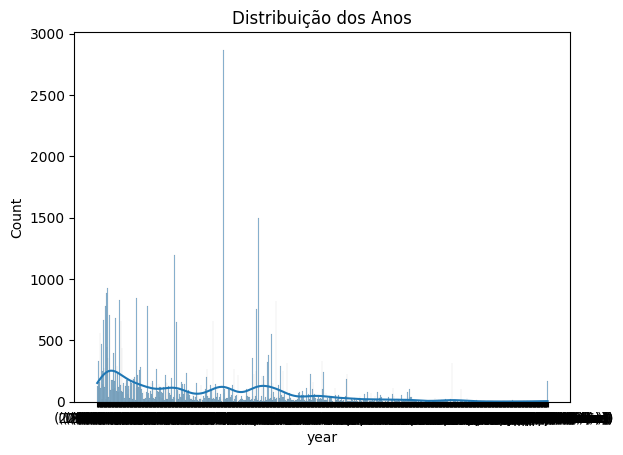

<ipython-input-24-a54755d75c2b>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [24]:
# Verifique informações sobre os atributos
df.info()

# Obtém estatísticas descritivas para colunas numéricas
estatisticas_descritivas = df.describe()

# Exibe o resumo estatístico
print("Resumo estatístico dos atributos numéricos:")
print(estatisticas_descritivas)

# Verifique valores faltantes
df.isnull().sum()

# Visualize a distribuição de algumas variáveis
sns.histplot(df['year'], kde=True)
plt.title('Distribuição dos Anos')
plt.show()

# Tratamento de valores faltantes (exemplo: preenchimento com a média)
df.fillna(df.mean(), inplace=True)

# Outras transformações de dados conforme necessário

# Salve o dataset pré-processado
df.to_csv('war_movies_preprocessed.csv', index=False)


Ao analisar o descritivo, percebi que a coluna "duration" está vindo em string, como por exemplo "128 min". Vamos fazer uma alteração para que esse dado venha como númerico.

In [28]:
# Verificando os primeiros valores da coluna "duration" para entender o formato
print(df['duration'].head())

# Removendo o texto "min" e substituindo vírgulas por nada, convertendo para valores numéricos
df['duration'] = df['duration'].str.replace(' min', '').str.replace(',', '').astype(float)

# Verificando os primeiros valores após a modificação
print(df['duration'].head())


0     60 min
1     44 min
2    128 min
3    135 min
4    594 min
Name: duration, dtype: object
0     60.0
1     44.0
2    128.0
3    135.0
4    594.0
Name: duration, dtype: float64


Agora vamos fazer a seguinte análise: quais as guerras mais retratadas nos filmes e séries?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


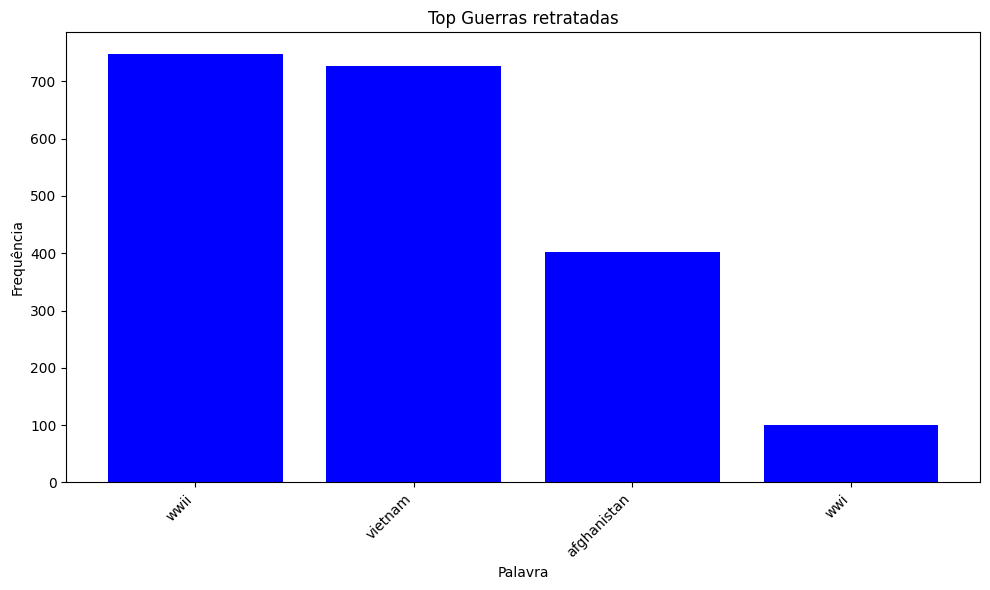

In [26]:
# Instale as bibliotecas necessárias
!pip install pandas nltk

# Importe as bibliotecas
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist


# Faça o download dos recursos necessários
nltk.download('stopwords')
nltk.download('punkt')

# Carregue o dataset se ainda não estiver carregado
# Certifique-se de ter o dataset carregado na variável df

# Carregue as stopwords em português
stop_words = set(stopwords.words('english'))

# Combine todas as descrições em uma única string
all_descriptions = ' '.join(df['description'].astype(str))

# Tokenize as palavras
words = word_tokenize(all_descriptions.lower())  # Converta para minúsculas para evitar diferenciação entre maiúsculas e minúsculas

# Adicione mais palavras-chave relacionadas a guerras, se necessário
palavras_chave_guerras = ['WWII', 'Vietnam', 'WWI', 'World War II', 'World War I', 'World War One', 'World War 1', 'World War 2', 'World War Two', 'First World War', 'Great War', 'Afghanistan', 'American Civil War']

# Crie um padrão de expressão regular com as palavras-chave
pattern = re.compile('|'.join(palavras_chave_guerras), flags=re.IGNORECASE)

# Encontre todas as correspondências nas descrições
matches = re.findall(pattern, all_descriptions)

# Remova as stopwords e palavras irrelevantes
filtered_words = [word for word in matches if word.isalnum() and word not in stop_words]

# Padronize a capitalização das palavras
filtered_words = [word.lower() for word in matches if word.isalnum() and word not in stop_words]

# Calcule a frequência das palavras
freq_dist = FreqDist(filtered_words)

# Crie um DataFrame com as palavras e suas frequências
word_freq_df = pd.DataFrame(list(freq_dist.items()), columns=['Palavra', 'Frequência'])

# Ordene o DataFrame pela frequência em ordem decrescente
word_freq_df = word_freq_df.sort_values(by='Frequência', ascending=False)

# Extraindo as top palavras e frequências
top_words = word_freq_df.head(20)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_words['Palavra'], top_words['Frequência'], color='blue')
plt.title('Top guerras retratadas no cinema e na TV')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Ajusta a rotação dos rótulos do eixo x
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

É possível perceber na análise que a 2ª Guerra Mundial (WWII) é a mais retratada, com mais de 700 ocorrências na base, seguida pela guerra do Vietnã, Guerra do Afeganistão e por fim a 1ª Guerra Mundial.